## Solving for $d$

- Minimize the average error over all $x$, i.e.,

$ E = \frac{1}{2}\int_{-1}^1 (x-\hat{x})^2 \; dx $

- Substitute for $\hat{x}$:

$ 
\begin{align}
E = \frac{1}{2}\int_{-1}^1 \left(x-\sum_i^N a_i d_i \right)^2 \; dx 
\end{align}
$

- Take the derivative with respect to $d_i$:

$
\begin{align}
{{\partial E} \over {\partial d_i}} &= {1 \over 2} \int_{-1}^1 2 \left[ x-\sum_j a_j d_j \right] (-a_i) \; dx \\
{{\partial E} \over {\partial d_i}} &= - \int_{-1}^1 a_i x \; dx + \int_{-1}^1 \sum_j a_j d_j a_i \; dx 
\end{align}
$

- At the minimum (i.e. smallest error), $ {{\partial E} \over {\partial d_i}} = 0$

$
\begin{align}
\int_{-1}^1 a_i x \; dx &= \int_{-1}^1 \sum_j(a_j d_j a_i) \; dx \\
\int_{-1}^1 a_i x \; dx &= \sum_j \left(\int_{-1}^1 a_i a_j \; dx\right)d_j 
\end{align}
$

- That's a system of $N$ equations and $N$ unknowns
- In fact, we can rewrite this in matrix form
    
$ \Upsilon = \Gamma d $

where

Populating the interactive namespace from numpy and matplotlib
Simulation finished in 0:00:01.                                                 


`%matplotlib` prevents importing * from pylab and numpy


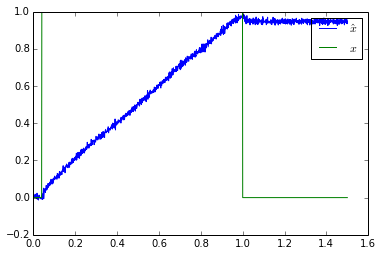

In [4]:
__author__ = 'Chow'
%pylab inline
import nengo
from nengo.utils.functions import piecewise
import matplotlib.pyplot as plt
import numpy as np

model = nengo.Network()

with model:
    #stim = nengo.Node(lambda t: 5*np.sin(5*t))
    stim = nengo.Node(piecewise({0.04:1, 1:0}))
    ensA = nengo.Ensemble(200, dimensions=1)

    def feedback(x):
        return x

    def input_func(u):
        return 0.05 * u

    nengo.Connection(stim, ensA, function=input_func, synapse=0.005)
    nengo.Connection(ensA, ensA, function=feedback, synapse=0.05)

    stim_p = nengo.Probe(stim)
    ensA_p = nengo.Probe(ensA, synapse=.01)

# model.config[nengo.Ensemble].neuron_type = nengo.LIFRate()

sim = nengo.Simulator(model)
sim.run(1.5)

plt.plot(sim.trange(), sim.data[ensA_p], label="$\hat{x}$")
plt.plot(sim.trange(), sim.data[stim_p], label="$x$")
plt.legend()
# plt.ylim(-.2,1.5);


plt.show()



